In [5]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [2]:
from tb_to_df import convert_tb_data

root_dir = 'permuted_mnist_gem'

df = convert_tb_data(root_dir)

df['trial'] = df['root'].map(lambda x: x[x.index('eps')::])

df['trial'] = df['trial'].map(lambda x: x.split('/tb')[0])

df[['eps', 'lr','optimizer','seed']] = df['trial'].str.split(',', expand=True)

for col in ['eps', 'lr','optimizer','seed']:
    df[col] = df[col].map(lambda x: x.split(col+'=')[1])
    

df['seed'] = df['seed'].str[0:3]

df = df[['wall_time', 'name', 'step', 'value', 'eps', 'lr',
       'optimizer', 'seed']]


df['optimizer'][df.optimizer == "krad"] = "krad*"
df['optimizer'][df.optimizer == "kradmm"] = "krad"

# df[['root','trial']] = df['root'].str.split('cdcd_',expand=True)

2023-01-19 18:28:15.928972: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 18:28:16.442917: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-19 18:28:16.545340: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-19 18:28:16.545379: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [3]:
df

,wall_time,name,step,value,eps,lr,optimizer,seed
0,1.673323e+09,ray/tune/Top1_Acc_Epoch/train_phase/train_stre...,1.0,0.232000,0.0000,0.0200,sgd,300
1,1.673323e+09,ray/tune/Top1_Acc_Exp/eval_phase/test_stream/T...,1.0,0.827000,0.0000,0.0200,sgd,300
2,1.673323e+09,ray/tune/Top1_Acc_Exp/eval_phase/test_stream/T...,1.0,0.827200,0.0000,0.0200,sgd,300
3,1.673323e+09,ray/tune/Top1_Acc_Exp/eval_phase/test_stream/T...,1.0,0.836900,0.0000,0.0200,sgd,300
4,1.673323e+09,ray/tune/Top1_Acc_Exp/eval_phase/test_stream/T...,1.0,0.841000,0.0000,0.0200,sgd,300
...,...,...,...,...,...,...,...,...
30155,1.673404e+09,Top1_Acc_Exp/eval_phase/test_stream/Task000/Ex...,2000.0,0.845500,0.0001,0.0100,kradmm,100
30156,1.673404e+09,Top1_Acc_Exp/eval_phase/test_stream/Task000/Ex...,2000.0,0.841200,0.0001,0.0100,kradmm,100
30157,1.673404e+09,Top1_Acc_Exp/eval_phase/test_stream/Task000/Ex...,2000.0,0.844500,0.0001,0.0100,kradmm,100
30158,1.673404e+09,Top1_Acc_Exp/eval_phase/test_stream/Task000/Ex...,2000.0,0.790300,0.0001,0.0100,kradmm,100


/tmp/ipykernel_378799/2606954837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()


sgd, best lr = 0.0050


/tmp/ipykernel_378799/2606954837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()


adam, best lr = 0.0010


/tmp/ipykernel_378799/2606954837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()


krad, best lr = 0.0100


/tmp/ipykernel_378799/2606954837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()


shampoo, best lr = 0.0100


/tmp/ipykernel_378799/2606954837.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()


kradmm, best lr = 0.0100


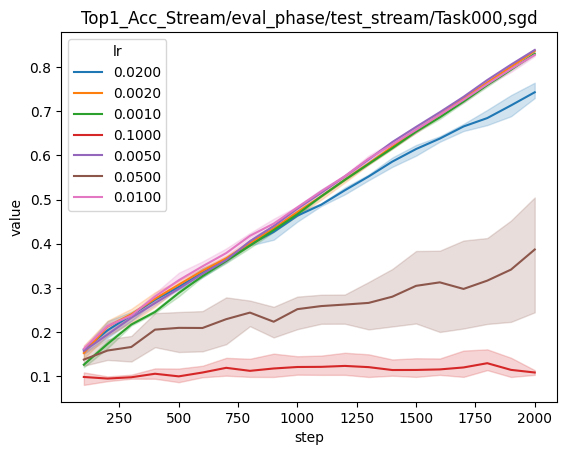

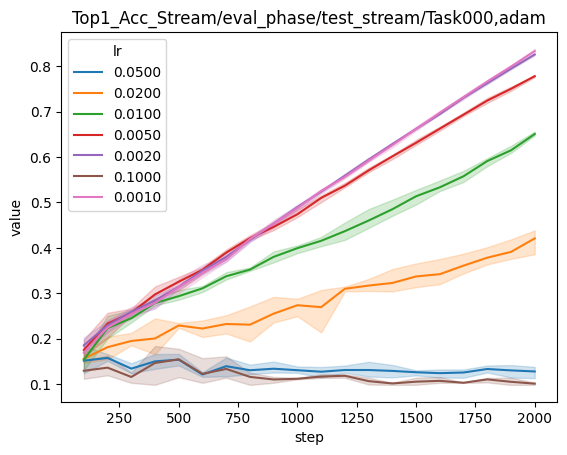

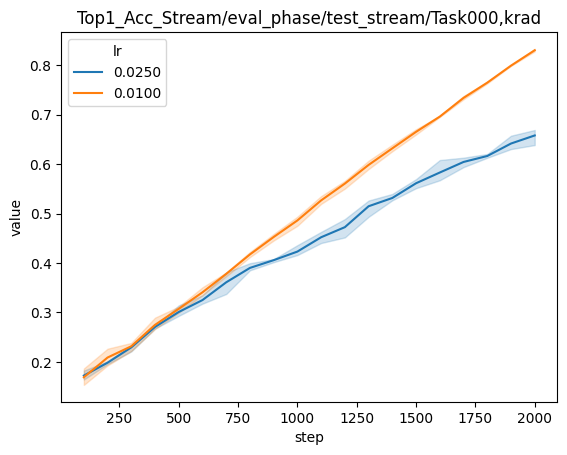

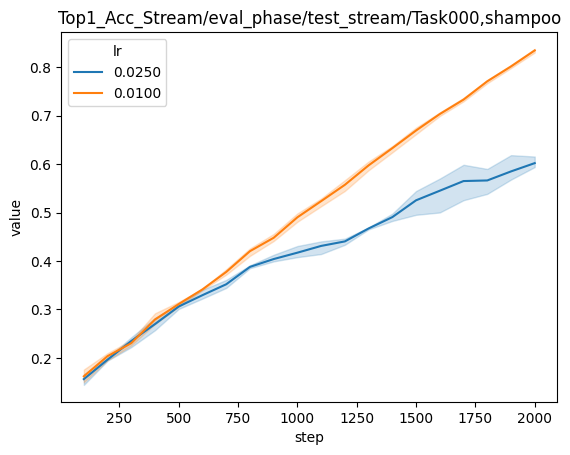

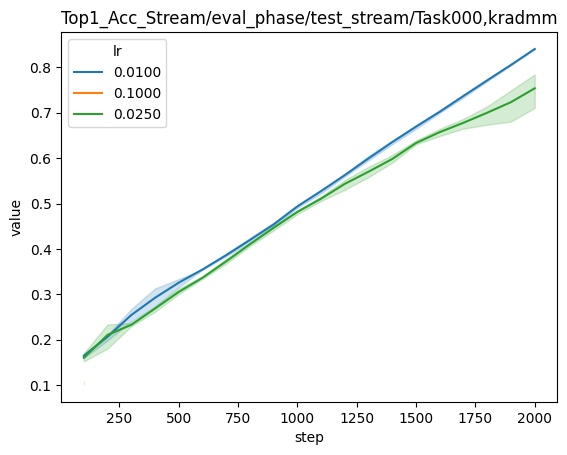

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


best_lrs = {}

for curve in ['Top1_Acc_Stream/eval_phase/test_stream/Task000']:
    for opt in df.optimizer.unique():
    

        df_plot = df.query(f'optimizer == "{opt}" ').query(f'name == "{curve}"')
        plt.figure(), sns.lineplot(df_plot, x='step',y='value',hue='lr'), plt.title(curve+','+opt)
        
        df_ag=df_plot.groupby(['step','lr']).agg('mean').reset_index()
        best_lr= df_ag[df_ag.value == df_ag.value.max()].lr.values[0]
        print(f"{opt}, best lr = {best_lr}")
        best_lrs[opt]=best_lr


In [7]:
best_lrs

{'sgd': '0.0050',
 'adam': '0.0010',
 'krad': '0.0100',
 'shampoo': '0.0100',
 'kradmm': '0.0100'}

In [18]:
sns.lineplot?

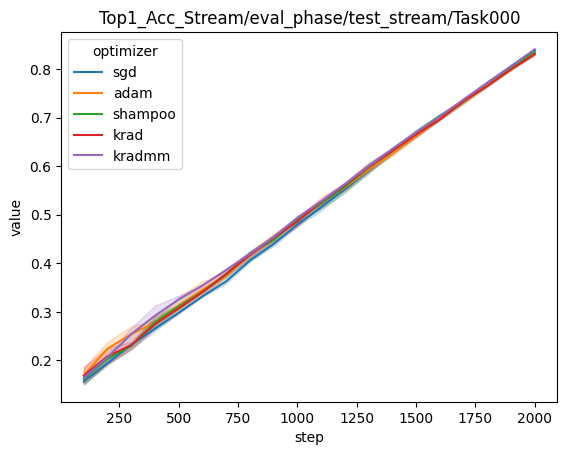

In [17]:
import pandas as pd

df_list = []

for opt,lr in best_lrs.items():
    df_list.append(df.query(f'optimizer == "{opt}"').query(f'lr == "{lr}"'))
    
df_plot = pd.concat(df_list)

for curve in ['Top1_Acc_Stream/eval_phase/test_stream/Task000']:
# for curve in df_plot.name.unique():
    if 'ray' in curve:
        continue
    if 'hparams' in curve:
        continue
    
    df_p = df_plot.query(f'name == "{curve}"')
    
    df_min = df_p.query('optimizer == "sgd"').groupby(['step']).agg('mean').reset_index()
    
    
    
    plt.figure(1), plt.subplot(211), sns.lineplot(df_p, x='step',y='value', hue = 'optimizer', errorbar=None, hue_order=hue_order), plt.title(curve)
    plt.legend(loc='lower right', prop={'size': 8})
    
    
#     for step in df_min.step.unique():
#         step_series = df_p.step == step
#         df_p['value'][step_series] = df_p['value'][step_series] - float(df_min.value[df_min.step == step])
    
    plt.figure(1)
    plt.subplot(212)
    sns.lineplot(df_p, x='step',y='value', hue = 'optimizer',errorbar=None, hue_order=hue_order), plt.title("Top1 Acc Relative to SGD")
    plt.legend(loc='upper right',prop={'size': 8})
#     plt.grid(True)
    
    plt.subplots_adjust(hspace = 0.6)
    

/tmp/ipykernel_3921550/2277816222.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()


,optimizer,value
0,adam,0.833498
1,krad,0.830442
2,kradmm,0.840525
3,sgd,0.839025
4,shampoo,0.835048


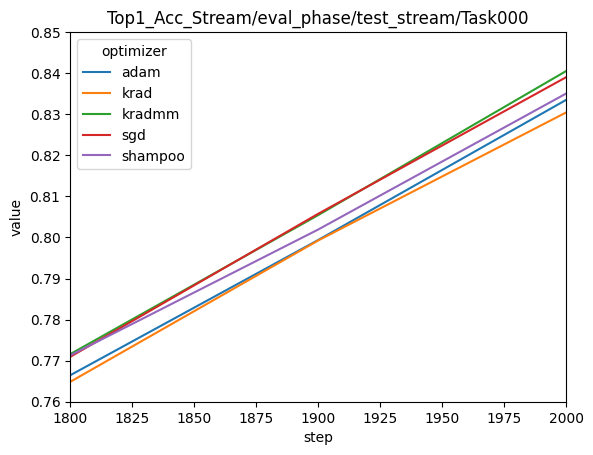

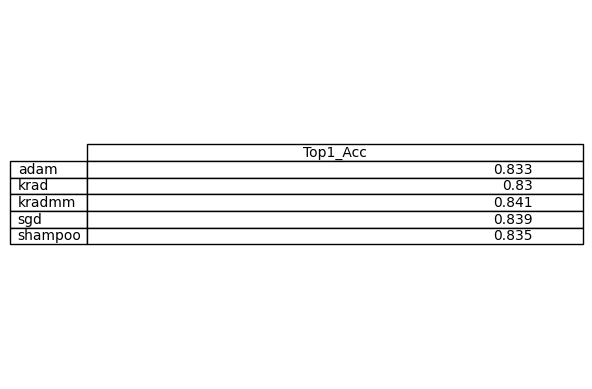

In [209]:
#Test stream final performance

curve = 'Top1_Acc_Stream/eval_phase/test_stream/Task000'
df_best = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

plt.figure(), sns.lineplot(df_best, x='step',y='value', hue = 'optimizer'), plt.title(curve),
plt.xlim([1800,2000]), plt.ylim([.76,.85])

df_bs=df_best.query('step == 2000')

plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
plt.axis('off')

df_bs[['optimizer','value']].reset_index(drop=True)
    

In [226]:
pd.DataFrame?

/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()
/tmp/ipykernel_3921550/1090476159.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

,E00,E01,E02,E03,E04,E05,E06,E07,E08,E09,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19
adam,0.838,0.836,0.844,0.838,0.839,0.841,0.847,0.840,0.840,0.843,0.841,0.837,0.839,0.838,0.836,0.836,0.836,0.827,0.819,0.754
krad,0.835,0.833,0.833,0.838,0.838,0.832,0.839,0.843,0.843,0.839,0.839,0.844,0.846,0.838,0.833,0.840,0.841,0.836,0.814,0.704
kradmm,0.829,0.841,0.831,0.843,0.838,0.839,0.841,0.840,0.846,0.851,0.847,0.849,0.844,0.849,0.846,0.844,0.847,0.848,0.838,0.799
sgd,0.827,0.834,0.837,0.822,0.836,0.838,0.835,0.845,0.840,0.842,0.846,0.852,0.850,0.847,0.851,0.847,0.842,0.845,0.840,0.801
shampoo,0.837,0.840,0.837,0.832,0.839,0.842,0.838,0.846,0.840,0.838,0.844,0.843,0.839,0.844,0.853,0.846,0.846,0.843,0.840,0.716


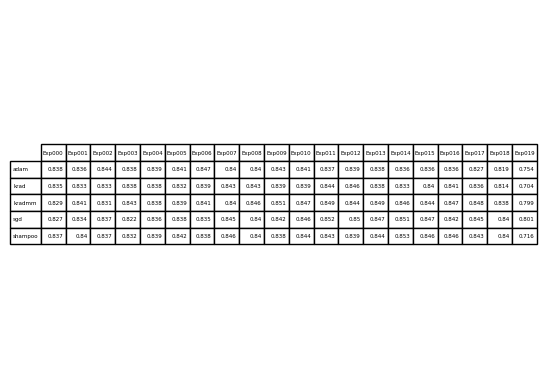

In [248]:
import numpy as np

# final performance per experience
table_columns = []
col_labels = []
row_labels = []
for curve in df_plot.name.unique():
    if 'ray' in curve:
        continue
    if 'hparams' in curve:
        continue
    exp = curve.split('/')[-1]
    
    if 'Task' in exp:
        continue
        
    df_mean = df_plot.query(f'name == "{curve}"').groupby(['step','optimizer']).agg('mean').reset_index()

#     plt.figure(), sns.lineplot(df_mean, x='step',y='value', hue = 'optimizer'), plt.title(curve),
#     plt.xlim([1800,2000])

    df_final=df_mean.query('step == 2000')
    
    table_columns.append(df_final.value.to_list())
    col_labels.append(curve.split('/')[-1])
    row_labels.append(df_final.optimizer.to_list())


table_columns = np.transpose(table_columns)


plt.figure(), plt.table(cellText=np.round(table_columns,3), colLabels=col_labels, loc='center',rowLabels=row_labels[0], fontsize=100.0)
plt.axis('off')

df_exp = pd.DataFrame(data=np.round(table_columns,3), index = row_labels[0], columns = ['E'+x[-2::] for x in col_labels])
df_exp

# plt.figure(), plt.table(cellText=[[round(x,3)] for x in df_bs.value.to_list()], colLabels=['Top1_Acc'], loc='center',rowLabels=df_bs.optimizer.to_list())
# plt.axis('off')

# df_bs[['optimizer','value']].reset_index(drop=True)

In [242]:
plt.table?

In [158]:
df_p.groupby(['step']).agg('min').reset_index()

,step,wall_time,name,value,eps,lr,optimizer,seed
0,100.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.149635,0.0000,0.0010,adam,100
1,200.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.190635,0.0000,0.0010,adam,100
2,300.0,1.673320e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.221850,0.0000,0.0010,adam,100
3,400.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.260720,0.0000,0.0010,adam,100
4,500.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.296390,0.0000,0.0010,adam,100
5,600.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.331040,0.0000,0.0010,adam,100
6,700.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.358435,0.0000,0.0010,adam,100
7,800.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.403420,0.0000,0.0010,adam,100
8,900.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.435930,0.0000,0.0010,adam,100
9,1000.0,1.673321e+09,Top1_Acc_Stream/eval_phase/test_stream/Task000,0.475215,0.0000,0.0010,adam,100


In [176]:
sns.lineplot?